In [1]:

#### Libraries
# Standard library
import pickle as cPickle  # Sorry, workaround for Python 3.4
import gzip

# Third-party libraries
import numpy as np

def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f, encoding='latin1')  # Make it work with Py3.x
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


In [2]:
%time training_data, validation_data, test_data = load_data_wrapper()

CPU times: user 1.78 s, sys: 643 ms, total: 2.42 s
Wall time: 2.57 s


In [3]:
%time x, y = zip(*training_data)

x = np.array(x)
x = x.reshape(50000, 784)

y = np.array(y)
y = y.reshape(50000, 10)

CPU times: user 53.6 ms, sys: 30.8 ms, total: 84.4 ms
Wall time: 86.4 ms


In [4]:
import keras


import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.utils import np_utils, generic_utils

from sklearn.preprocessing import StandardScaler

np.random.seed(1337) # for reproducibility


def preprocess_data(X, scaler=None):
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler



In [5]:
nb_classes = y.shape[1]
dims = x.shape[1]

In [6]:
LAYER_ONE_SIZE = 1024

model = Sequential()
model.add(Dense(dims, LAYER_ONE_SIZE, init='glorot_uniform'))
model.add(PReLU((LAYER_ONE_SIZE,)))
model.add(BatchNormalization((LAYER_ONE_SIZE,)))
model.add(Dropout(0.5))

model.add(Dense(LAYER_ONE_SIZE, nb_classes, init='glorot_uniform'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam")

%time model.fit(x, y, nb_epoch=8, batch_size=128, validation_split=0.15)  

Train on 42500 samples, validate on 7500 samples
Epoch 0
42500/42500 [==============================] - 18s - loss: 0.4334 - val. loss: 0.1989
Epoch 1
42500/42500 [==============================] - 19s - loss: 0.1457 - val. loss: 0.1462
Epoch 2
42500/42500 [==============================] - 20s - loss: 0.1018 - val. loss: 0.1260
Epoch 3
42500/42500 [==============================] - 29s - loss: 0.0792 - val. loss: 0.1129
Epoch 4
42500/42500 [==============================] - 26s - loss: 0.0636 - val. loss: 0.1016
Epoch 5
42500/42500 [==============================] - 30s - loss: 0.0523 - val. loss: 0.0984
Epoch 6
42500/42500 [==============================] - 28s - loss: 0.0453 - val. loss: 0.0940
Epoch 7
42500/42500 [==============================] - 17s - loss: 0.0393 - val. loss: 0.0914
CPU times: user 4min 13s, sys: 22 s, total: 4min 35s
Wall time: 3min 11s


In [10]:
model.layers

In [13]:
firstlayer_weights = model.layers[0].W.eval()

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
def show_layer(layer):
    weights = layer.W.eval()
    print(weights.shape)
    plt.imshow(weights)

(784, 1024)


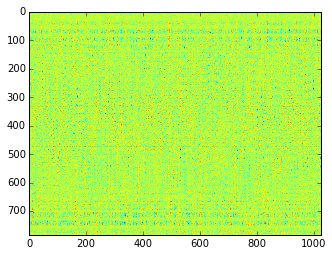

In [32]:
show_layer(model.layers[0])


(1024, 10)


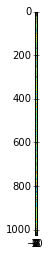

In [33]:
show_layer(model.layers[4])